In [4]:
import numpy as np
import cv2
import os
import random
from tqdm import tqdm

from Autoencoder import *
from make_video import *


# def main():
#     # PATHS
#     DATASET = r'C:\Users\saad\Desktop\Autoencoders\Videos\Dataset'  # where there is dataset
#     DATASET_NAME = ['bunny_video.mp4','Rabbit_video.mp4','bicycle_sequence.mp4'] # Name of the video
#     # where you want to save the frames
#     FRAMES = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results'
#     FRAME_NAME = ['bunny','rabbit','bicycle']
#     FRAME_TRAIN =['bunny_train','rabbit_train','bicycle_train']
#     FRAME_TEST = ['bunny_test','rabbit_test','bicycle_test']

#     #Creating the video frames for each video
#     for idx,f in enumerate(FRAME_NAME):
#         names,fps,width,height = read_video(os.path.join(FRAMES,f),os.path.join(DATASET,DATASET_NAME[idx]))
#         print(f'{f} completed')
    
#     #Randomly selecting certain number of images
    
    
    
#     return

# if __name__ == "__main__":
#     main()

1 Physical GPUs, 1 Logical GPUs


In [5]:
# PATHS
DATASET = r'C:\Users\saad\Desktop\Autoencoders\Videos\Dataset'  # where there is dataset
DATASET_NAME = ['bunny_video.mp4','Rabbit_video.mp4','bicycle_sequence.mp4'] # Name of the video
# where you want to save the frames
FRAMES = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results'
FRAME_NAME = ['bunny','rabbit','bicycle']
FRAME_TRAIN =['bunny_train','rabbit_train','bicycle_train']
FRAME_TEST = ['bunny_test','rabbit_test','bicycle_test']
names = [0 , 0 , 0]

In [6]:
#Creating the video frames for each video
for idx,f in enumerate(FRAME_NAME):
    names[idx],fps,width,height = read_video(os.path.join(FRAMES,f),os.path.join(DATASET,DATASET_NAME[idx]))
    print(f'{f} completed')

#Randomly selecting certain number of images

Loading Video...
Completed
bunny completed
Loading Video...
Completed
rabbit completed
Loading Video...
Completed
bicycle completed


In [20]:
# 0 is for bunny
# 1 is for rabbit
# 2 is for bicycle

from shutil import copy

for i in tqdm(range(len(names)),desc='categorization'):
    
    train,test = splitter(np.array(names[i]),0.2)
    
    for j in tqdm(range(len(train)),desc='Training Data'):
        copy(os.path.join(FRAMES,FRAME_NAME[i],train[j]),os.path.join(FRAMES,FRAME_TRAIN[i]))
        
    for k in tqdm(range(len(test)),desc='Testing Data'):
        copy(os.path.join(FRAMES,FRAME_NAME[i],test[k]),os.path.join(FRAMES,FRAME_TEST[i]))

Training Data: 100%|████████████████████████████████████████████████████████████████| 591/591 [00:00<00:00, 902.54it/s]

Training Data: 100%|████████████████████████████████████████████████████████████████| 212/212 [00:00<00:00, 517.69it/s]

Training Data: 100%|██████████████████████████████████████████████████████████████████| 89/89 [00:00<00:00, 639.29it/s]

categorization: 100%|████████████████████████████████████████████████████████████████████| 3/3 [00:01<00:00,  1.96it/s]


In [13]:
train =[]
test = []

for j in tqdm(range(len(train)),desc='Training Data'):
    copy(os.path.join(FRAMES,FRAME_NAME[i],train[j]),os.path.join(FRAMES,FRAME_TRAIN[i]))
        
    for k in tqdm(range(len(test)),desc='Testing Data'):
        copy(os.path.join(FRAMES,FRAME_NAME[i],test[k]),os.path.join(FRAMES,FRAME_TEST[i]))


((591,), (148,))

In [15]:
os.path.join(FRAMES,FRAME_NAME[0],FRAME_TRAIN[0])

'C:\\Users\\saad\\Desktop\\Autoencoders\\Videos\\Results\\bunny\\bunny_train'

In [25]:
images = []
for n in tqdm(FRAME_TRAIN):
    foo = os.path.join(FRAMES,n)
    im = np.array(read_imgs(foo,os.listdir(foo),2,640,480))
    images.append(im)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:46<00:00, 15.65s/it]


In [44]:
images_test = []
for n in tqdm(FRAME_TEST):
    foo = os.path.join(FRAMES,n)
    im = np.array(read_imgs(foo,os.listdir(foo),2,640,480))
    images_test.append(im)

100%|████████████████████████████████████████████████████████████████████████████████████| 3/3 [00:15<00:00,  5.10s/it]


In [28]:
images1 = np.array(images)

C:\Users\saad\Anaconda3\envs\keras-gpu\lib\site-packages\ipykernel_launcher.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  """Entry point for launching an IPython kernel.


In [43]:
images1[0].shape,images1[1].shape,images1[2].shape

((1182, 480, 320, 3), (424, 480, 320, 3), (178, 480, 320, 3))

In [39]:
images2= images2.flatten()

In [40]:
images2.shape

(3,)

In [41]:
flat_list = [item for sublist in images for item in sublist]

In [42]:
f = np.array(flat_list)
f.shape

(1784, 480, 320, 3)

In [45]:
image_test1 = [item for sublist in images_test for item in sublist]
image_test2 = np.array(image_test1)
image_test2.shape

(450, 480, 320, 3)

In [46]:
model1,model2 = build_autoencoder(f.shape[1:],512,'Hi-Res',None)

In [47]:
model1.compile(loss='mse',optimizer='adam',metrics=['mae'])
model2.compile(loss='mse',optimizer='adam',metrics=['mae'])

Epoch 1/200
286/286 [==============================] - 3s 12ms/step - loss: 1394.4803 - mae: 23.0286 - val_loss: 118.0254 - val_mae: 7.2692
Epoch 2/200
286/286 [==============================] - 3s 11ms/step - loss: 262.7263 - mae: 11.1709 - val_loss: 83.8366 - val_mae: 6.0725
Epoch 3/200
286/286 [==============================] - 3s 11ms/step - loss: 280.2429 - mae: 11.4317 - val_loss: 81.9536 - val_mae: 6.0604
Epoch 4/200
286/286 [==============================] - 3s 11ms/step - loss: 152.8779 - mae: 7.8784 - val_loss: 47.0111 - val_mae: 4.2281
Epoch 5/200
286/286 [==============================] - 3s 11ms/step - loss: 130.2668 - mae: 7.1647 - val_loss: 35.9637 - val_mae: 3.2661
Epoch 6/200
286/286 [==============================] - 3s 11ms/step - loss: 111.7068 - mae: 6.4952 - val_loss: 32.6264 - val_mae: 3.1300
Epoch 7/200
286/286 [==============================] - 3s 11ms/step - loss: 173.5312 - mae: 8.3897 - val_loss: 31.7487 - val_mae: 2.9558
Epoch 8/200
286/286 [===============

Epoch 61/200
286/286 [==============================] - 3s 11ms/step - loss: 43.7290 - mae: 3.9610 - val_loss: 12.1546 - val_mae: 1.5225
Epoch 62/200
286/286 [==============================] - 3s 11ms/step - loss: 37.5208 - mae: 3.4123 - val_loss: 12.7214 - val_mae: 1.6561
Epoch 63/200
286/286 [==============================] - 3s 11ms/step - loss: 41.7385 - mae: 3.8980 - val_loss: 12.2451 - val_mae: 1.5783
Epoch 64/200
286/286 [==============================] - 3s 11ms/step - loss: 253.2335 - mae: 8.0944 - val_loss: 76.5895 - val_mae: 5.6386
Epoch 65/200
286/286 [==============================] - 3s 11ms/step - loss: 68.0603 - mae: 4.9255 - val_loss: 16.5415 - val_mae: 1.9745
Epoch 66/200
286/286 [==============================] - 3s 11ms/step - loss: 47.1980 - mae: 3.9334 - val_loss: 14.3066 - val_mae: 1.7585
Epoch 67/200
286/286 [==============================] - 3s 11ms/step - loss: 42.9810 - mae: 3.6994 - val_loss: 13.4845 - val_mae: 1.6710
Epoch 68/200
286/286 [==================

286/286 [==============================] - 3s 11ms/step - loss: 44.9130 - mae: 4.1231 - val_loss: 11.8263 - val_mae: 1.4906
Epoch 121/200
286/286 [==============================] - 3s 11ms/step - loss: 35.9742 - mae: 3.3136 - val_loss: 12.2305 - val_mae: 1.5903
Epoch 122/200
286/286 [==============================] - 3s 11ms/step - loss: 42.6880 - mae: 3.9781 - val_loss: 12.9985 - val_mae: 1.8567
Epoch 123/200
286/286 [==============================] - 3s 11ms/step - loss: 37.8285 - mae: 3.5873 - val_loss: 11.8328 - val_mae: 1.5146
Epoch 124/200
286/286 [==============================] - 3s 11ms/step - loss: 35.6434 - mae: 3.2629 - val_loss: 11.7321 - val_mae: 1.4810
Epoch 125/200
286/286 [==============================] - 3s 11ms/step - loss: 35.6134 - mae: 3.2641 - val_loss: 11.7772 - val_mae: 1.4903
Epoch 126/200
286/286 [==============================] - 3s 11ms/step - loss: 286.9603 - mae: 8.7120 - val_loss: 22.7110 - val_mae: 2.5190
Epoch 127/200
286/286 [========================

286/286 [==============================] - 3s 11ms/step - loss: 35.3644 - mae: 3.2493 - val_loss: 11.7049 - val_mae: 1.4771
Epoch 180/200
286/286 [==============================] - 3s 11ms/step - loss: 36.0488 - mae: 3.3805 - val_loss: 12.2512 - val_mae: 1.6351
Epoch 181/200
286/286 [==============================] - 3s 11ms/step - loss: 37.3010 - mae: 3.5616 - val_loss: 15.0528 - val_mae: 2.2961
Epoch 182/200
286/286 [==============================] - 3s 11ms/step - loss: 39.2838 - mae: 3.7135 - val_loss: 11.7286 - val_mae: 1.4806
Epoch 183/200
286/286 [==============================] - 3s 11ms/step - loss: 35.7337 - mae: 3.3270 - val_loss: 12.0194 - val_mae: 1.5608
Epoch 184/200
286/286 [==============================] - 3s 11ms/step - loss: 35.4946 - mae: 3.3094 - val_loss: 12.0064 - val_mae: 1.5570
Epoch 185/200
286/286 [==============================] - 3s 11ms/step - loss: 40.6129 - mae: 3.8946 - val_loss: 13.6156 - val_mae: 1.8933
Epoch 186/200
286/286 [=========================

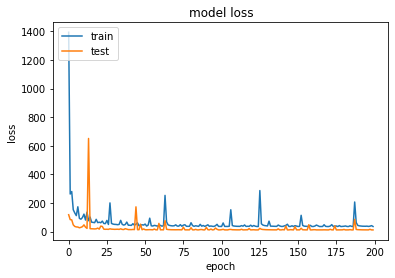

------------------------------ Loading the best weights ------------------------------


In [48]:
WEIGHTS = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Weights'
model1 = model_fit(model1,'model1_combined',WEIGHTS,f,f,200,5)

In [49]:
train_intermediate = data_prep(f,model1,None)

100%|██████████████████████████████████████████████████████████████████████████████| 1784/1784 [04:02<00:00,  7.34it/s]


The shape of the input for the model is (1784, 480, 320, 3)


Epoch 1/200
286/286 [==============================] - 20s 70ms/step - loss: 527.7023 - mae: 9.9964 - val_loss: 13.5968 - val_mae: 1.5915
Epoch 2/200
286/286 [==============================] - 20s 68ms/step - loss: 38.0789 - mae: 3.3405 - val_loss: 12.0017 - val_mae: 1.4781
Epoch 3/200
286/286 [==============================] - 20s 68ms/step - loss: 35.0961 - mae: 3.2222 - val_loss: 11.6646 - val_mae: 1.4546
Epoch 4/200
286/286 [==============================] - 19s 68ms/step - loss: 33.7803 - mae: 3.1564 - val_loss: 11.7971 - val_mae: 1.5442
Epoch 5/200
286/286 [==============================] - 20s 68ms/step - loss: 33.1730 - mae: 3.1880 - val_loss: 11.3908 - val_mae: 1.4332
Epoch 6/200
286/286 [==============================] - 19s 68ms/step - loss: 31.9213 - mae: 3.1071 - val_loss: 11.4024 - val_mae: 1.4577
Epoch 7/200
286/286 [==============================] - 20s 68ms/step - loss: 31.2967 - mae: 3.1220 - val_loss: 11.3096 - val_mae: 1.4337
Epoch 8/200
286/286 [===================

286/286 [==============================] - 19s 68ms/step - loss: 21.3140 - mae: 2.8258 - val_loss: 10.5739 - val_mae: 1.3907
Epoch 61/200
286/286 [==============================] - 19s 68ms/step - loss: 19.3063 - mae: 2.5407 - val_loss: 10.5957 - val_mae: 1.4066
Epoch 62/200
286/286 [==============================] - 19s 68ms/step - loss: 20.4900 - mae: 2.7474 - val_loss: 10.7209 - val_mae: 1.4118
Epoch 63/200
286/286 [==============================] - 19s 68ms/step - loss: 19.3623 - mae: 2.5509 - val_loss: 10.6213 - val_mae: 1.3988
Epoch 64/200
286/286 [==============================] - 19s 68ms/step - loss: 19.1932 - mae: 2.5388 - val_loss: 10.7794 - val_mae: 1.4356
Epoch 65/200
286/286 [==============================] - 19s 68ms/step - loss: 20.7676 - mae: 2.7574 - val_loss: 10.5586 - val_mae: 1.3978
Epoch 66/200
286/286 [==============================] - 19s 68ms/step - loss: 19.3873 - mae: 2.5879 - val_loss: 10.8818 - val_mae: 1.4221
Epoch 67/200
286/286 [=========================

286/286 [==============================] - 19s 68ms/step - loss: 17.7323 - mae: 2.4620 - val_loss: 10.5832 - val_mae: 1.3890
Epoch 120/200
286/286 [==============================] - 19s 68ms/step - loss: 17.8438 - mae: 2.4898 - val_loss: 10.6699 - val_mae: 1.4107
Epoch 121/200
286/286 [==============================] - 19s 68ms/step - loss: 18.0173 - mae: 2.5066 - val_loss: 10.4954 - val_mae: 1.3871
Epoch 122/200
286/286 [==============================] - 19s 68ms/step - loss: 17.9132 - mae: 2.5029 - val_loss: 10.6518 - val_mae: 1.4062
Epoch 123/200
286/286 [==============================] - 19s 68ms/step - loss: 17.6616 - mae: 2.4559 - val_loss: 10.6035 - val_mae: 1.3899
Epoch 124/200
286/286 [==============================] - 19s 68ms/step - loss: 18.1722 - mae: 2.5316 - val_loss: 10.6746 - val_mae: 1.3939
Epoch 125/200
286/286 [==============================] - 19s 68ms/step - loss: 17.6850 - mae: 2.4617 - val_loss: 10.5442 - val_mae: 1.4060
Epoch 126/200
286/286 [==================

286/286 [==============================] - 19s 68ms/step - loss: 17.9120 - mae: 2.5332 - val_loss: 10.7174 - val_mae: 1.4248
Epoch 179/200
286/286 [==============================] - 19s 68ms/step - loss: 17.0210 - mae: 2.4062 - val_loss: 10.5263 - val_mae: 1.3822
Epoch 180/200
286/286 [==============================] - 19s 68ms/step - loss: 17.2217 - mae: 2.4453 - val_loss: 10.5405 - val_mae: 1.3844
Epoch 181/200
286/286 [==============================] - 19s 68ms/step - loss: 16.9747 - mae: 2.4079 - val_loss: 11.2390 - val_mae: 1.5870
Epoch 182/200
286/286 [==============================] - 19s 68ms/step - loss: 17.3378 - mae: 2.4557 - val_loss: 10.6936 - val_mae: 1.4283
Epoch 183/200
286/286 [==============================] - 19s 68ms/step - loss: 17.0542 - mae: 2.4233 - val_loss: 10.7379 - val_mae: 1.4273
Epoch 184/200
286/286 [==============================] - 19s 68ms/step - loss: 17.5407 - mae: 2.4966 - val_loss: 10.7234 - val_mae: 1.4208
Epoch 185/200
286/286 [==================

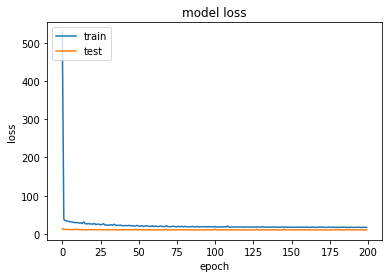

------------------------------ Loading the best weights ------------------------------


In [50]:
model2 = model_fit(model2,'model2_combined',WEIGHTS,train_intermediate,f,200,5)

In [56]:
predictions = data_prep(image_test2,model1,model2)
# predictions = predictions * 255.

100%|████████████████████████████████████████████████████████████████████████████████| 450/450 [01:17<00:00,  5.79it/s]


The shape of the input for the model is (450, 480, 320, 3)


In [57]:
predictions.shape

(450, 480, 320, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Text(0.5, 1.0, 'Final Output')

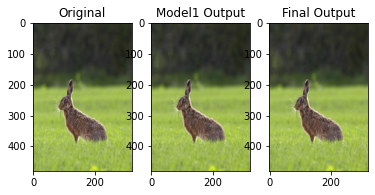

In [95]:
import matplotlib.pyplot as plt
ids = 299

plt.subplot(131)
plt.imshow(image_test2[ids,:,:,:])
plt.title('Original')

plt.subplot(132)
x = model1.predict(np.expand_dims(image_test2[ids],axis=0))
x = x.reshape(480,320,3)
plt.imshow(x.astype(int))
plt.title('Model1 Output')

plt.subplot(133)
y = predictions[ids]
plt.imshow(y.astype(int))
plt.title('Final Output')

In [65]:
image_test2[:1,:,:,:].shape

(1, 480, 320, 3)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


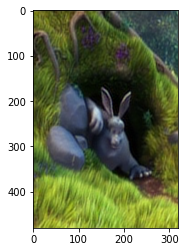

In [79]:
g = model1.predict(np.expand_dims(f[0],axis=0))
g=g.reshape(480,320,3)
plt.imshow(g.astype(int))

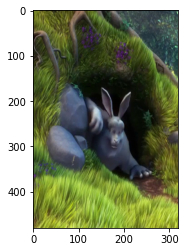

In [76]:
plt.imshow(f[0])

In [78]:
g.astype(int)

array([[[ 76,  83,  50],
        [ 88,  94,  60],
        [ 96, 105,  64],
        ...,
        [ 72, 100,  99],
        [ 76, 105, 102],
        [ 79, 107, 104]],

       [[ 86,  92,  53],
        [102, 110,  64],
        [115, 124,  71],
        ...,
        [ 77, 108, 103],
        [ 84, 116, 109],
        [ 86, 118, 109]],

       [[ 92,  95,  50],
        [111, 119,  64],
        [124, 130,  70],
        ...,
        [ 81, 114, 106],
        [ 93, 126, 116],
        [ 96, 130, 117]],

       ...,

       [[129, 122,  57],
        [132, 124,  54],
        [132, 124,  50],
        ...,
        [158, 170,  42],
        [148, 161,  36],
        [144, 156,  33]],

       [[130, 124,  57],
        [134, 127,  55],
        [134, 126,  51],
        ...,
        [151, 163,  38],
        [146, 158,  35],
        [143, 155,  34]],

       [[131, 126,  59],
        [135, 130,  57],
        [136, 129,  53],
        ...,
        [147, 159,  37],
        [144, 155,  36],
        [142, 153,  35]]

In [ ]:
path = r'C:\Users\saad\Desktop\Autoencoders\Videos\Dataset'
vid_name = 'Bicycle_Sequence.mp4'

In [ ]:
names,fps,width,height=read_video(os.getcwd(),os.path.join(path,vid_name))

In [ ]:
print(f'The fps is {fps}, The width of the frame is {width} and the height of the frame is {height}')

In [ ]:
names

In [ ]:
images = np.array(read_imgs(os.getcwd(),names,2,640,480))
images = images.astype('float32')/255.
print(f'The shape of the images is {images.shape}')

In [ ]:
img_shape = images.shape[1:]
print(img_shape)

In [ ]:
model1,model2 = build_autoencoder(img_shape,512,'Hi-Res',None)

In [ ]:
weights = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Weights'
weights = weights.replace('\\','/')


In [ ]:
model1.load_weights(os.path.join(weights,'model1.hdf5'))
model2.load_weights(os.path.join(weights,'model2.hdf5'))

In [ ]:
img_new = model1.predict(images)

In [ ]:
img_new.shape

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(img_new[75,:,:,:])

In [ ]:
from tqdm import tqdm
import numpy as np
preds=[]
for i in tqdm(range(len(img_new))):
    preds.append(model2.predict(np.expand_dims(img_new[i],axis=0)))

In [ ]:
pr = np.array(preds)
pr.shape

In [ ]:
pr= pr.reshape(224,480,320,3)

In [ ]:
plt.imshow(pr[75,:,:,:])

In [ ]:
plt.imshow(images[75,:,:,:])

In [ ]:
im = 3
plt.figure(figsize=(14,10))

plt.subplot(131)
plt.imshow(images[im,:,:,:])
plt.title('Original')

plt.subplot(132)
plt.imshow(img_new[im,:,:,:])
plt.title('Intermediate')

plt.subplot(133)
plt.imshow(pr[im,:,:,:])
plt.title('Reconstructed')

plt.show()

In [ ]:
predictions = pr * 255.

In [ ]:
VIDEO = r'C:\Users\saad\Desktop\Autoencoders\Videos\Results\Video'
video_creater('Recon_bicycle.avi',VIDEO,25.,640,480,predictions) 

In [ ]:
 original_video('Original_bicycle.avi',VIDEO,os.getcwd(),25.,names)

In [ ]:
os.getcwd()

In [ ]:
lst=['a','b','c']

for i,j in enumerate(lst):
    print('i:',i)
    print('j:',j)